In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import annotations
import numpy as np

from matplotlib import rc, colors
import matplotlib.pyplot as plt

rc("font", **{"family": "serif", "serif": ["Times"]})
rc("text", usetex=True)
c1 = (0.439, 0.788, 1.000)
c2 = (0.420, 0.502, 1.000)
c3 = "black"
c4 = (1.000, 0.224, 0.376)
c5 = (0.784, 0.231, 0.576)
c7 = (0.992, 0.251, 0.733)
c8 = (0.867, 0.871, 0.184)
c9 = (0.949, 0.922, 0.678)
c10 = (0.984, 0.455, 0.231)
c11 = (0.765, 0.835, 0.922)
c12 = (0.965, 0.694, 0.486)
c13 = (0.992, 0.584, 0.820)

In [3]:
from astropy.visualization import time_support

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

/Users/lilli/Library/Caches/pypoetry/virtualenvs/mflex-cNoQEf_u-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
tstart = "2024-05-01 01:00"
tend = "2024-05-14 23:00"
result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
print(result)

Results from 1 Provider:

56 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2024-05-01 00:00:00.000 2024-05-01 23:59:59.999 ...     NOAA      flx1s
2024-05-02 00:00:00.000 2024-05-02 23:59:59.999 ...     NOAA      flx1s
2024-05-03 00:00:00.000 2024-05-03 23:59:59.999 ...     NOAA      flx1s
2024-05-04 00:00:00.000 2024-05-04 23:59:59.999 ...     NOAA      flx1s
2024-05-05 00:00:00.000 2024-05-05 23:59:59.999 ...     NOAA      flx1s
2024-05-06 00:00:00.000 2024-05-06 23:59:59.999 ...     NOAA      flx1s
2024-05-07 00:00:00.000 2024-05-07 23:59:59.999 ...     NOAA      flx1s
2024-05-08 00:00:00.000 2024-05-08 23:59:59.999 ...     NOAA      flx1s
2

In [5]:
result_avg1m_16 = Fido.search(
    a.Time(tstart, tend),
    a.Instrument("XRS"),
    a.goes.SatelliteNumber(16),
    a.Resolution("avg1m"),
)
print(result_avg1m_16)

Results from 1 Provider:

14 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2024-05-01 00:00:00.000 2024-05-01 23:59:59.999 ...     NOAA      avg1m
2024-05-02 00:00:00.000 2024-05-02 23:59:59.999 ...     NOAA      avg1m
2024-05-03 00:00:00.000 2024-05-03 23:59:59.999 ...     NOAA      avg1m
2024-05-04 00:00:00.000 2024-05-04 23:59:59.999 ...     NOAA      avg1m
2024-05-05 00:00:00.000 2024-05-05 23:59:59.999 ...     NOAA      avg1m
2024-05-06 00:00:00.000 2024-05-06 23:59:59.999 ...     NOAA      avg1m
2024-05-07 00:00:00.000 2024-05-07 23:59:59.999 ...     NOAA      avg1m
2024-05-08 00:00:00.000 2024-05-08 23:59:59.999 ...     NOAA      avg1m
2

In [6]:
file_avg1m_16 = Fido.fetch(result_avg1m_16)

Files Downloaded: 100%|██████████| 14/14 [00:01<00:00, 11.03file/s]


In [7]:
file_avg1m_16

['/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240501_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240502_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240503_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240504_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240505_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240506_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240507_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240508_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240509_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240510_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240511_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240512_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240513_v2-2-0.nc', '/Users/lilli/sunpy/data/sci_xrsf-l2-avg1m_g16_d20240514_v2-2-0.nc']

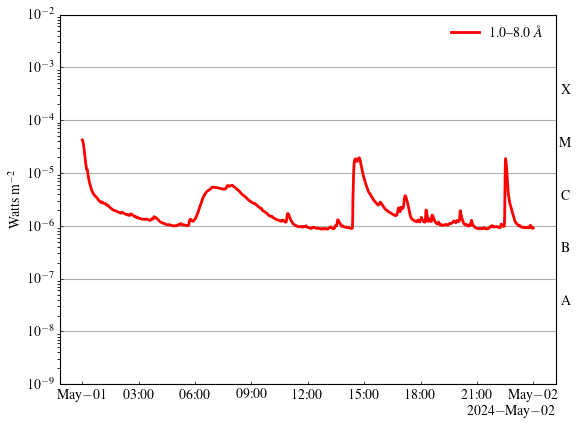

In [9]:
goes_16 = ts.TimeSeries(file_avg1m_16[0])
fig, ax = plt.subplots()
goes_16.plot(axes=ax, columns=["xrsb"])
ax.legend(frameon=False)
ax.tick_params(direction="in", length=2, width=0.5)
plt.show()

In [7]:
goes_16_0 = ts.TimeSeries(file_avg1m_16[0])
goes_16_1 = ts.TimeSeries(file_avg1m_16[1])
goes_16_2 = ts.TimeSeries(file_avg1m_16[2])
goes_16_3 = ts.TimeSeries(file_avg1m_16[3])
goes_16_4 = ts.TimeSeries(file_avg1m_16[4])
goes_16_5 = ts.TimeSeries(file_avg1m_16[5])
goes_16_6 = ts.TimeSeries(file_avg1m_16[6])
goes_16_7 = ts.TimeSeries(file_avg1m_16[7])
goes_16_8 = ts.TimeSeries(file_avg1m_16[8])
goes_16_9 = ts.TimeSeries(file_avg1m_16[9])
goes_16_10 = ts.TimeSeries(file_avg1m_16[10])
goes_16_11 = ts.TimeSeries(file_avg1m_16[11])
goes_16_12 = ts.TimeSeries(file_avg1m_16[12])
goes_16_13 = ts.TimeSeries(file_avg1m_16[13])

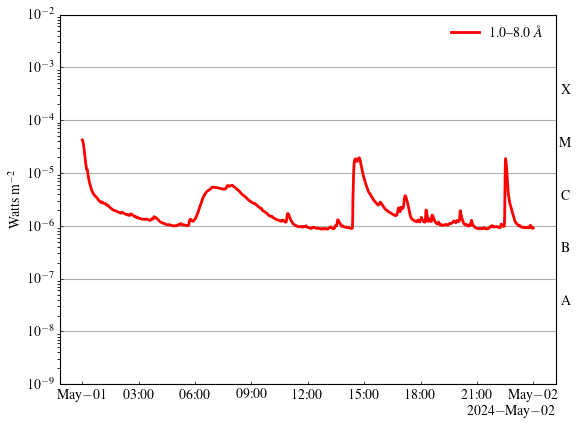

In [11]:
fig, ax = plt.subplots()
goes_16_0.plot(axes=ax, columns=["xrsb"])
ax.legend(frameon=False)
ax.tick_params(direction="in", length=2, width=0.5)
plt.show()

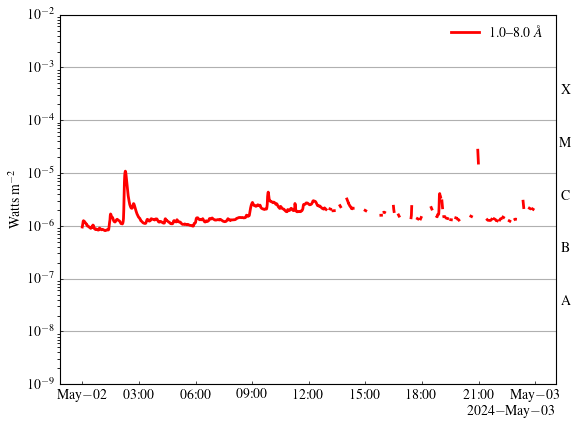

In [12]:
fig, ax = plt.subplots()
goes_16_1.plot(axes=ax, columns=["xrsb"])
ax.legend(frameon=False)
ax.tick_params(direction="in", length=2, width=0.5)
plt.show()

In [8]:
goes_16_0_xrsb = goes_16_0.extract("xrsb")
goes_16_1_xrsb = goes_16_1.extract("xrsb")
goes_16_2_xrsb = goes_16_2.extract("xrsb")
goes_16_3_xrsb = goes_16_3.extract("xrsb")
goes_16_4_xrsb = goes_16_4.extract("xrsb")
goes_16_5_xrsb = goes_16_5.extract("xrsb")
goes_16_6_xrsb = goes_16_6.extract("xrsb")
goes_16_7_xrsb = goes_16_7.extract("xrsb")
goes_16_8_xrsb = goes_16_8.extract("xrsb")
goes_16_9_xrsb = goes_16_9.extract("xrsb")
goes_16_10_xrsb = goes_16_10.extract("xrsb")
goes_16_11_xrsb = goes_16_11.extract("xrsb")
goes_16_12_xrsb = goes_16_12.extract("xrsb")
goes_16_13_xrsb = goes_16_13.extract("xrsb")

In [9]:
goes_16_0_xrsb_arr = goes_16_0_xrsb.to_array()
goes_16_1_xrsb_arr = goes_16_1_xrsb.to_array()
goes_16_2_xrsb_arr = goes_16_2_xrsb.to_array()
goes_16_3_xrsb_arr = goes_16_3_xrsb.to_array()
goes_16_4_xrsb_arr = goes_16_4_xrsb.to_array()
goes_16_5_xrsb_arr = goes_16_5_xrsb.to_array()
goes_16_6_xrsb_arr = goes_16_6_xrsb.to_array()
goes_16_7_xrsb_arr = goes_16_7_xrsb.to_array()
goes_16_8_xrsb_arr = goes_16_8_xrsb.to_array()
goes_16_9_xrsb_arr = goes_16_9_xrsb.to_array()
goes_16_10_xrsb_arr = goes_16_10_xrsb.to_array()
goes_16_11_xrsb_arr = goes_16_11_xrsb.to_array()
goes_16_12_xrsb_arr = goes_16_12_xrsb.to_array()
goes_16_13_xrsb_arr = goes_16_13_xrsb.to_array()

In [10]:
folder = "/Users/lilli/Desktop/Thesis/May2024_flare"

In [16]:
goes_16_10_xrsb_arr.shape

(1440, 1)

In [11]:
print(
    goes_16_5_xrsb_arr.argmax(),
    goes_16_6_xrsb_arr.argmax(),
    goes_16_7_xrsb_arr.argmax(),
    goes_16_8_xrsb_arr.argmax(),
    goes_16_9_xrsb_arr.argmax(),
    goes_16_10_xrsb_arr.argmax(),
)

395 990 101 553 414 83


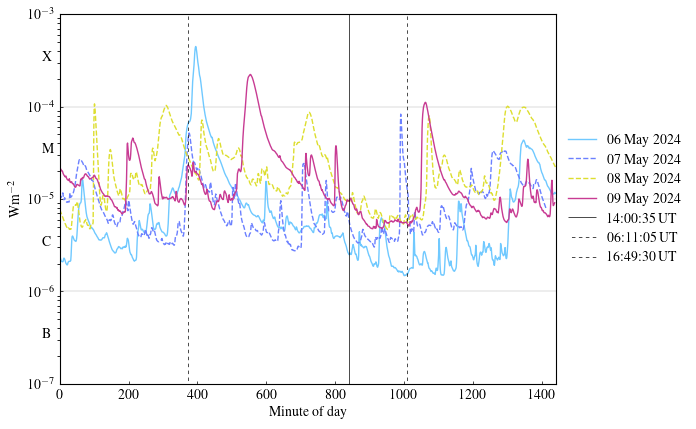

In [13]:


plt.hlines([10**-3, 10**-4, 10**-5, 10**-6], xmin=-0, xmax=1440, lw=0.1, color="black")
# plt.plot(goes_16_0_xrsb_arr, lw=1.0, c=c1, label="01 May", linestyle="dashed")
# plt.plot(goes_16_1_xrsb_arr, lw=1.0, c=c3, label="02 May")
# plt.plot(goes_16_2_xrsb_arr, lw=1.0, c=c1, label="03 May", linestyle="dashed")
# plt.plot(goes_16_3_xrsb_arr, lw=1.0, c=c1, label="04 May", linestyle="dashed")
# plt.plot(goes_16_4_xrsb_arr, lw=1.0, c=c1, label="05 May", linestyle="dashed")

plt.plot(goes_16_5_xrsb_arr, lw=1.0, c=c1, label="06 May 2024")
plt.plot(goes_16_6_xrsb_arr, lw=1.0, c=c2, label="07 May 2024", linestyle="dashed")
plt.plot(goes_16_7_xrsb_arr, lw=1.0, c=c8, label="08 May 2024", linestyle="dashed")
plt.plot(goes_16_8_xrsb_arr, lw=1.0, c=c5, label="09 May 2024")  # , linestyle=(5,(5,5)))
# plt.plot(goes_16_9_xrsb_arr, lw=1.0, c=c13, label="10 May") #, linestyle="solid")
# plt.plot(goes_16_10_xrsb_arr, lw=1.0, c=c8, label="11 May") #, linestyle="dashed")

# plt.vlines([309, 395, 990, 553], ymin=10**-7, ymax=10**-3, lw=0.5,color=c3)

plt.vlines([840.58], ymin=10**-7, ymax=10**-3, lw=0.5, color=c3, label="14:00:35 UT")

plt.vlines(
    [371.08],
    ymin=10**-7,
    ymax=10**-3,
    lw=0.5,
    color=c3,
    linestyle=(5, (5, 5)),
    label="06:11:05 UT",
)
plt.vlines(
    [1009.5],
    ymin=10**-7,
    ymax=10**-3,
    lw=0.5,
    color=c3,
    linestyle=(5, (5, 5)),
    label="16:49:30 UT",
)

plt.yscale("log")
plt.ylim([10**-7, 10**-3])
plt.xlim([0, 1440])
plt.xlabel("Minute of day")
plt.ylabel(r"W$\textrm{m}^{-2}$ ")
plt.text(-50, 10**-3.5, "X")
plt.text(-50, 10**-4.5, "M")
plt.text(-50, 10**-5.5, "C")
plt.text(-50, 10**-6.5, "B")
plt.tick_params(direction="in", length=2, width=0.5)
plt.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
plotname = folder + "/GOES_Xray_avg1m_2024_May_during.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)

plt.show()

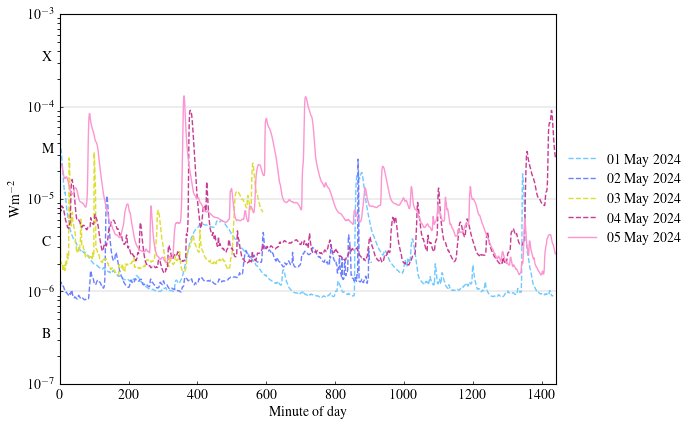

In [18]:
plt.hlines([10**-3, 10**-4, 10**-5, 10**-6], xmin=-0, xmax=1440, lw=0.1, color="black")
plt.plot(goes_16_0_xrsb_arr, lw=1.0, c=c1, label="01 May 2024", linestyle="dashed")
plt.plot(goes_16_1_xrsb_arr, lw=1.0, c=c2, label="02 May 2024", linestyle="dashed")
plt.plot(goes_16_2_xrsb_arr, lw=1.0, c=c8, label="03 May 2024", linestyle="dashed")
plt.plot(goes_16_3_xrsb_arr, lw=1.0, c=c5, label="04 May 2024", linestyle="dashed")
plt.plot(goes_16_4_xrsb_arr, lw=1.0, c=c13, label="05 May 2024")

# plt.plot(goes_16_5_xrsb_arr, lw=1.0, c=c1, label="06 May")
# plt.plot(goes_16_6_xrsb_arr, lw=1.0, c=c2, label="07 May", linestyle="dashed")
# plt.plot(goes_16_7_xrsb_arr, lw=1.0, c=c8, label="08 May", linestyle="dashed")
# plt.plot(goes_16_8_xrsb_arr, lw=1.0, c=c5, label="09 May") #, linestyle=(5,(5,5)))

# plt.plot(goes_16_9_xrsb_arr, lw=1.0, c=c13, label="10 May") #, linestyle="solid")
# plt.plot(goes_16_10_xrsb_arr, lw=1.0, c=c8, label="11 May") #, linestyle="dashed")

# plt.vlines([395, 990, 101, 553, 414, 83], ymin=10**-7, ymax=10**-3, lw=0.5,color=c3)

plt.yscale("log")
plt.ylim([10**-7, 10**-3])
plt.xlim([0, 1440])
plt.xlabel("Minute of day")
plt.ylabel(r"W$\textrm{m}^{-2}$ ")
plt.text(-50, 10**-3.5, "X")
plt.text(-50, 10**-4.5, "M")
plt.text(-50, 10**-5.5, "C")
plt.text(-50, 10**-6.5, "B")
plt.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/GOES_Xray_avg1m_2024_May_before.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)

plt.show()

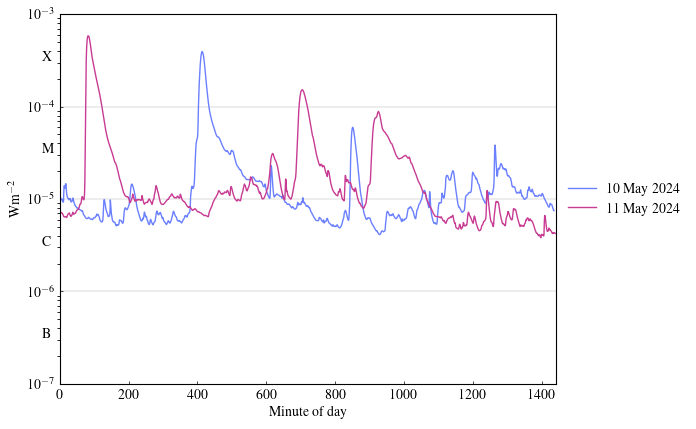

In [19]:
plt.hlines([10**-3, 10**-4, 10**-5, 10**-6], xmin=-0, xmax=1440, lw=0.1, color="black")
# plt.plot(goes_16_0_xrsb_arr, lw=1.0, c=c1, label="01 May", linestyle="dashed")
# plt.plot(goes_16_1_xrsb_arr, lw=1.0, c=c2, label="02 May" , linestyle="dashed")
# plt.plot(goes_16_2_xrsb_arr, lw=1.0, c=c8, label="03 May", linestyle="dashed")
# plt.plot(goes_16_3_xrsb_arr, lw=1.0, c=c5, label="04 May", linestyle="dashed")
# plt.plot(goes_16_4_xrsb_arr, lw=1.0, c=c13, label="05 May")

# plt.plot(goes_16_5_xrsb_arr, lw=1.0, c=c1, label="06 May")
# plt.plot(goes_16_6_xrsb_arr, lw=1.0, c=c2, label="07 May", linestyle="dashed")
# plt.plot(goes_16_7_xrsb_arr, lw=1.0, c=c8, label="08 May", linestyle="dashed")
# plt.plot(goes_16_8_xrsb_arr, lw=1.0, c=c5, label="09 May") #, linestyle=(5,(5,5)))

plt.plot(goes_16_9_xrsb_arr, lw=1.0, c=c2, label="10 May 2024")  # , linestyle="solid")
plt.plot(goes_16_10_xrsb_arr, lw=1.0, c=c5, label="11 May 2024")  # , linestyle="dashed")

# plt.vlines([395, 990, 101, 553, 414, 83], ymin=10**-7, ymax=10**-3, lw=0.5,color=c3)

plt.yscale("log")
plt.ylim([10**-7, 10**-3])
plt.xlim([0, 1440])
plt.xlabel("Minute of day")
plt.ylabel(r"W$\textrm{m}^{-2}$ ")
plt.text(-50, 10**-3.5, "X")
plt.text(-50, 10**-4.5, "M")
plt.text(-50, 10**-5.5, "C")
plt.text(-50, 10**-6.5, "B")
plt.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tick_params(direction="in", length=2, width=0.5)
plotname = folder + "/GOES_Xray_avg1m_2024_May_after.png"
plt.savefig(plotname, dpi=300, bbox_inches="tight", pad_inches=0.1)

plt.show()